In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [79]:
data = pd.read_csv('data.csv')

In [80]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [82]:
def info_plot(df, col): 
    counts = df[col].value_counts(normalize=True)
    counts.plot(kind='barh')
    for index, value in enumerate(counts):
        plt.text(value, index, str(round(value*100,1))+'%')
        plt.title('Распределение футболистов по '+ col)
        plt.xlabel('Доля')
    plt.show()

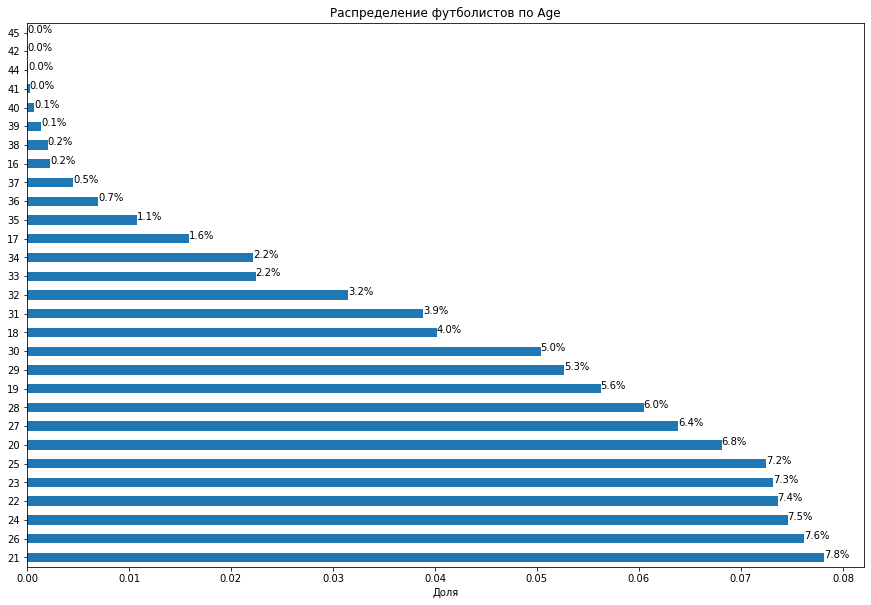

In [83]:
info_plot(data,'Age')

In [84]:
data['Release Clause'].describe()

count     16643
unique     1244
top       €1.1M
freq        557
Name: Release Clause, dtype: object

гипотеза: в разных клубах одинаковое распределение футболистов по возрасту (H0)

возьмем первые 4 самых известных клуба

можно выполнить однофакторный дисперсионный анализ 

In [85]:
from scipy import stats

In [86]:
F, p = stats.f_oneway(np.asarray(data[data['Club'] == 'FC Barcelona'].Age),
                      np.asarray(data[data['Club'] == 'Paris Saint-Germain'].Age),
                      np.asarray(data[data['Club'] == 'Juventus'].Age),
                      np.asarray(data[data['Club'] == 'Manchester United'].Age))
p

0.08777320279536177

Вывод: Мы не можем отвергнуть гипотезу H0, p >0.05

In [87]:
data.columns = data.columns.str.replace(' ','')

In [88]:
data.head()

,Unnamed:0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [89]:
data.columns = data.columns.str.lower()
data.head()

,unnamed:0,id,name,age,photo,nationality,flag,overall,potential,club,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,releaseclause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [90]:
data[data['releaseclause'].str.contains('K')== True]

,unnamed:0,id,name,age,photo,nationality,flag,overall,potential,club,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,releaseclause
1294,1294,14907,A. Bizzarri,40,https://cdn.sofifa.org/players/4/19/14907.png,Argentina,https://cdn.sofifa.org/flags/52.png,76,76,Foggia,...,60.0,11.0,12.0,11.0,76.0,74.0,66.0,82.0,76.0,€840K
1720,1720,114764,Iraizoz,37,https://cdn.sofifa.org/players/4/19/114764.png,Spain,https://cdn.sofifa.org/flags/45.png,75,75,Girona FC,...,56.0,15.0,11.0,12.0,69.0,77.0,74.0,85.0,67.0,€945K
1848,1848,165769,Cássio,37,https://cdn.sofifa.org/players/4/19/165769.png,Brazil,https://cdn.sofifa.org/flags/54.png,75,75,Al Taawoun,...,59.0,18.0,17.0,14.0,77.0,74.0,68.0,73.0,76.0,€743K
1952,1952,161468,P. Guiñazú,39,https://cdn.sofifa.org/players/4/19/161468.png,Argentina,https://cdn.sofifa.org/flags/52.png,75,75,Club Atlético Talleres,...,74.0,76.0,76.0,68.0,12.0,10.0,12.0,9.0,13.0,€675K
2062,2062,156412,J. Corona,37,https://cdn.sofifa.org/players/4/19/156412.png,Mexico,https://cdn.sofifa.org/flags/83.png,75,75,Cruz Azul,...,67.0,25.0,13.0,11.0,72.0,77.0,68.0,78.0,73.0,€765K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [91]:
data[data['releaseclause'].str.contains('M')== True]

,unnamed:0,id,name,age,photo,nationality,flag,overall,potential,club,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,releaseclause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15275,242677,V. Drchal,18,https://cdn.sofifa.org/players/4/19/242677.png,Czech Republic,https://cdn.sofifa.org/flags/12.png,60,76,Sparta Praha,...,47.0,17.0,22.0,20.0,13.0,9.0,11.0,6.0,13.0,€1.2M
15289,15289,243450,S. Marasovic,20,https://cdn.sofifa.org/players/4/19/243450.png,France,https://cdn.sofifa.org/flags/18.png,60,74,Olympique de Marseille,...,47.0,53.0,42.0,38.0,8.0,13.0,13.0,10.0,9.0,€1.1M
15291,15291,239355,R. Boultam,20,https://cdn.sofifa.org/players/4/19/239355.png,Netherlands,https://cdn.sofifa.org/flags/34.png,60,74,US Cremonese,...,48.0,41.0,51.0,43.0,5.0,5.0,6.0,10.0,8.0,€1M
15293,15293,240123,L. Plogmann,18,https://cdn.sofifa.org/players/4/19/240123.png,Germany,https://cdn.sofifa.org/flags/21.png,60,81,SV Werder Bremen,...,43.0,18.0,10.0,13.0,60.0,57.0,55.0,54.0,66.0,€1.1M


In [92]:
data.releaseclause = data.releaseclause.str.replace('€','')
mask = data['releaseclause'].str.contains('M')== True
data.loc[mask, 'releaseclause'] = data[mask].releaseclause.str.replace('M','').astype(float)*1000

In [93]:
data.loc[data['releaseclause'].str.contains('K')== True,'releaseclause'] = data[data['releaseclause'].str.contains('K')== True].releaseclause.str.replace('K','').astype(float)

In [94]:
data['releaseclause']

0        226500
1        127100
2        228100
3        138600
4        196400
          ...  
18202       143
18203       113
18204       165
18205       143
18206       165
Name: releaseclause, Length: 18207, dtype: object

In [95]:
data[data['releaseclause'].isnull()]

,unnamed:0,id,name,age,photo,nationality,flag,overall,potential,club,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,releaseclause
28,28,198710,J. Rodríguez,26,https://cdn.sofifa.org/players/4/19/198710.png,Colombia,https://cdn.sofifa.org/flags/56.png,88,89,FC Bayern München,...,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN
38,38,167664,G. Higuaín,30,https://cdn.sofifa.org/players/4/19/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,88,88,Milan,...,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN
91,91,187961,Paulinho,29,https://cdn.sofifa.org/players/4/19/187961.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,Guangzhou Evergrande Taobao FC,...,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN
166,166,212523,Anderson Talisca,24,https://cdn.sofifa.org/players/4/19/212523.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,90,Guangzhou Evergrande Taobao FC,...,74.0,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN
176,176,207410,M. Kovačić,24,https://cdn.sofifa.org/players/4/19/207410.png,Croatia,https://cdn.sofifa.org/flags/10.png,83,89,Chelsea,...,72.0,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,17979,241341,Zhang Yuan,21,https://cdn.sofifa.org/players/4/19/241341.png,China PR,https://cdn.sofifa.org/flags/155.png,51,60,Guizhou Hengfeng FC,...,43.0,47.0,41.0,46.0,12.0,12.0,10.0,13.0,9.0,NaN
18026,18026,241444,Chen Ji,21,https://cdn.sofifa.org/players/4/19/241444.png,China PR,https://cdn.sofifa.org/flags/155.png,50,59,Guizhou Hengfeng FC,...,38.0,46.0,48.0,51.0,15.0,8.0,10.0,13.0,7.0,NaN
18031,18031,243506,Zhou Xin,20,https://cdn.sofifa.org/players/4/19/243506.png,China PR,https://cdn.sofifa.org/flags/155.png,50,61,Stabæk Fotball,...,32.0,51.0,48.0,48.0,11.0,7.0,9.0,10.0,6.0,NaN
18056,18056,244872,L. Valeau,19,https://cdn.sofifa.org/players/4/19/244872.png,Italy,https://cdn.sofifa.org/flags/27.png,50,65,Ascoli,...,42.0,41.0,54.0,55.0,8.0,11.0,13.0,14.0,14.0,NaN


In [96]:
data['releaseclause'] = data['releaseclause'].fillna(0)

In [97]:
data[data['releaseclause'].isnull()]

,unnamed:0,id,name,age,photo,nationality,flag,overall,potential,club,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,releaseclause


In [103]:
a = data.corr()
a

,unnamed:0,id,age,overall,potential,special,internationalreputation,weakfoot,skillmoves,jerseynumber,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,releaseclause
unnamed:0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.413322,-0.204026,-0.415672,0.213645,...,-0.716173,-0.280829,-0.248564,-0.220034,0.027757,0.027026,0.030654,0.019842,0.025610,-0.483985
id,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,...,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778,-0.126343
age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,...,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313,0.066967
overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,...,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276,0.589200
potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,...,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341,0.547668
special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,...,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238,0.351100
internationalreputation,-0.413322,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,...,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444,0.618094
weakfoot,-0.204026,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,...,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574,0.149584
skillmoves,-0.415672,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,...,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925,0.289268
jerseynumber,0.213645,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,...,-0.167523,-0.142474,-0.133285,-0.124610,0.004807,0.001543,0.001162,-0.002736,0.003255,-0.089806


In [104]:
a[(abs(a)<0.6)] = 0

In [105]:
a

,unnamed:0,id,age,overall,potential,special,internationalreputation,weakfoot,skillmoves,jerseynumber,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,releaseclause
unnamed:0,1.000000,0.000000,0.000000,-0.972791,-0.633395,0.000000,0.000000,0.0,0.000000,0.0,...,-0.716173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
id,0.000000,1.000000,-0.739208,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
age,0.000000,-0.739208,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
overall,-0.972791,0.000000,0.000000,1.000000,0.660939,0.606960,0.000000,0.0,0.000000,0.0,...,0.727655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
potential,-0.633395,0.000000,0.000000,0.660939,1.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
special,0.000000,0.000000,0.000000,0.606960,0.000000,1.000000,0.000000,0.0,0.763412,0.0,...,0.752331,0.000000,0.000000,0.000000,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238,0.000000
internationalreputation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.618094
weakfoot,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
skillmoves,0.000000,0.000000,0.000000,0.000000,0.000000,0.763412,0.000000,0.0,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925,0.000000
jerseynumber,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [72]:
data.internationalreputation.unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [73]:
data.internationalreputation = data.internationalreputation.fillna(0)
data.internationalreputation = data.internationalreputation.astype(int)

In [29]:
d[1.2]=a

In [31]:
'DATA INGENER'[100:200]

''

In [74]:
data.internationalreputation.unique()

array([5, 4, 3, 2, 1, 0], dtype=int64)

In [75]:
gr = data.groupby('internationalreputation').releaseclause.mean()

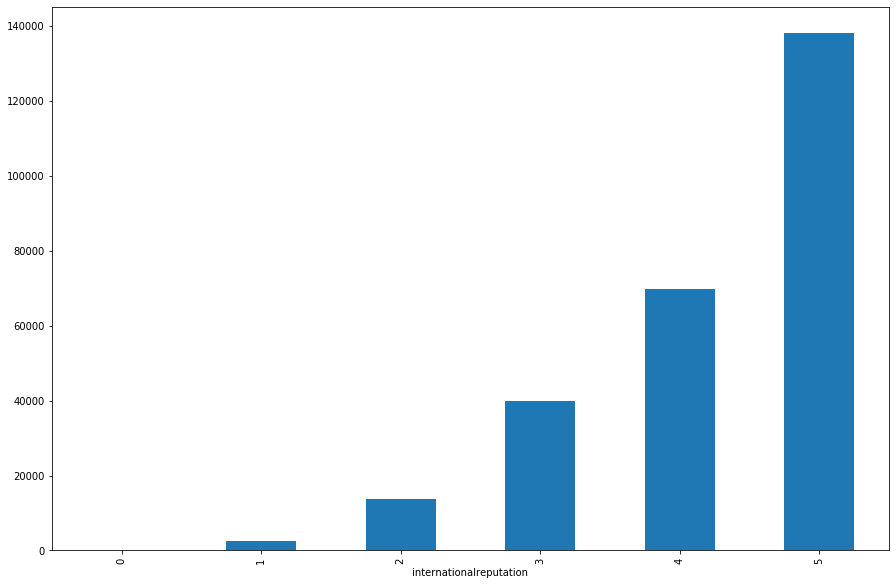

In [77]:
gr.plot(kind = 'bar')

In [193]:
data.internationalreputation.value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: internationalreputation, dtype: int64

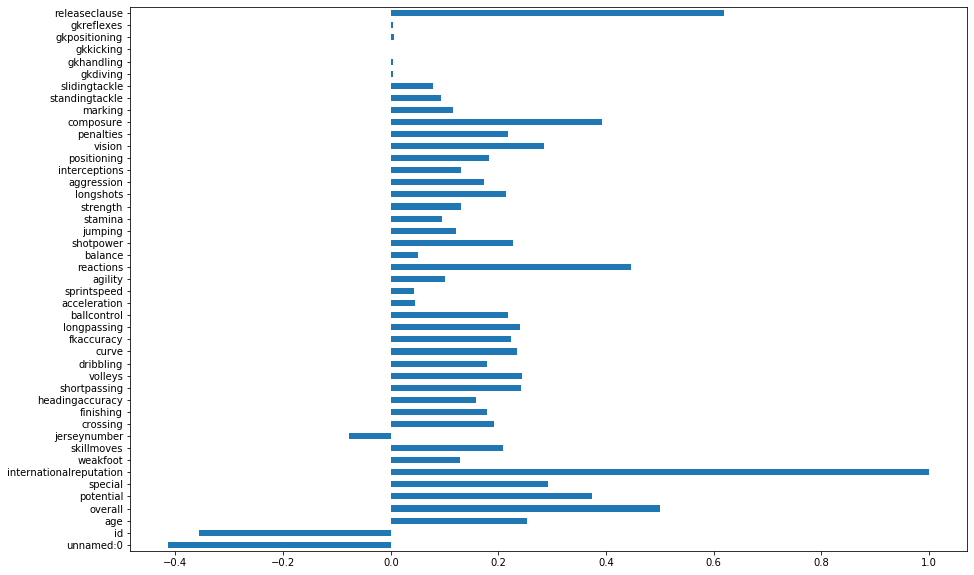

In [109]:
data.corr().internationalreputation.plot(kind = 'barh')

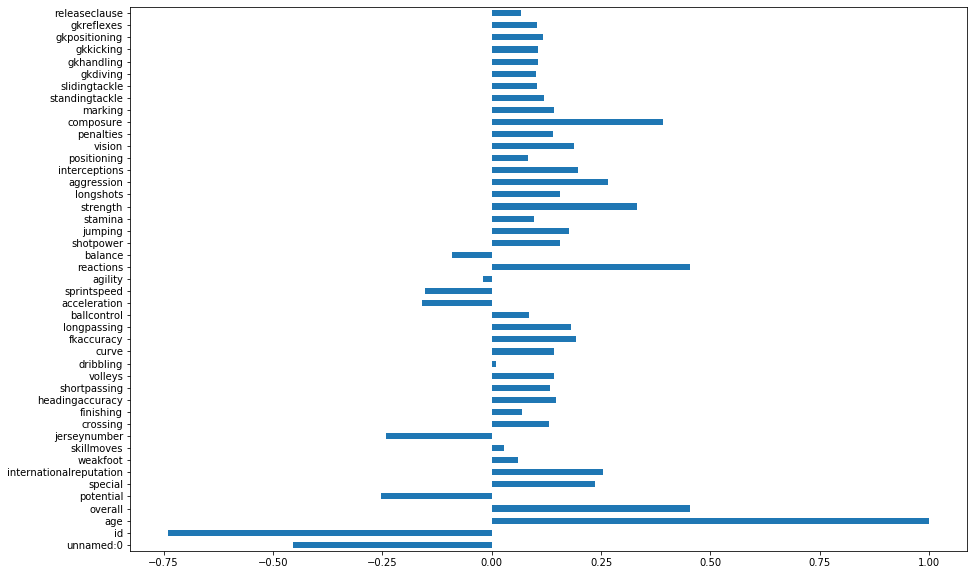

In [110]:
data.corr().age.plot(kind = 'barh')

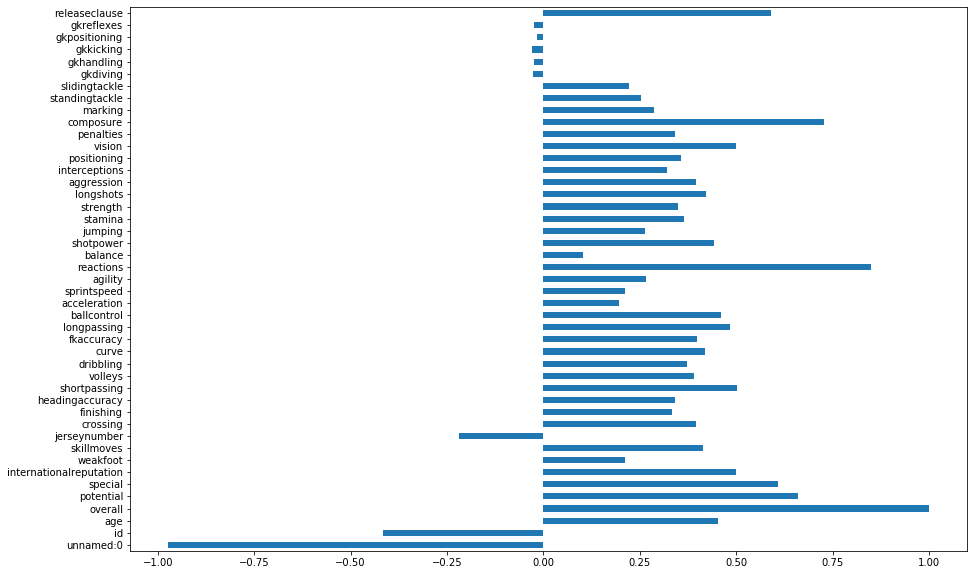

In [111]:
data.corr().overall.plot(kind = 'barh')

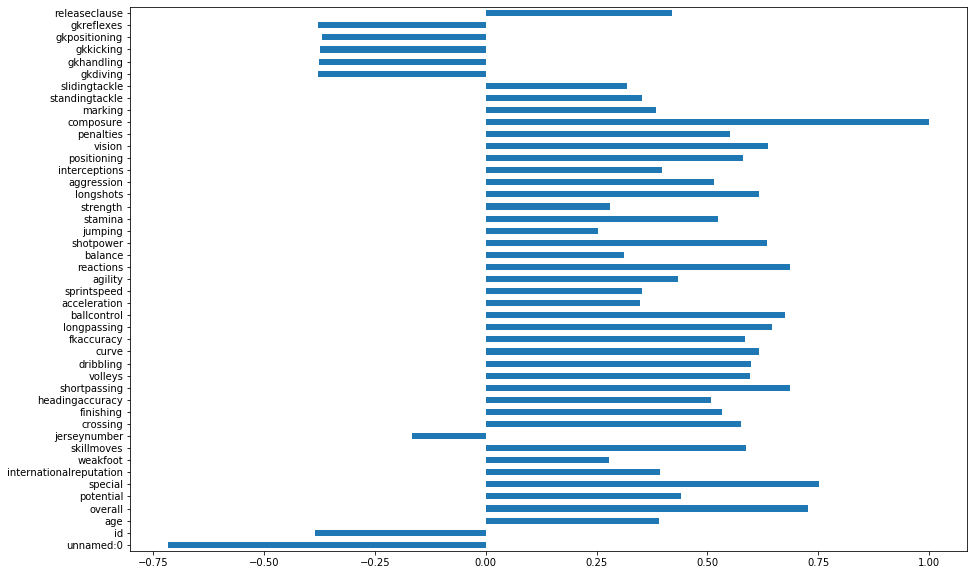

In [112]:
#Composure in footballing terms means, how calm and stable you are under pressure
data.corr().composure.plot(kind = 'barh')

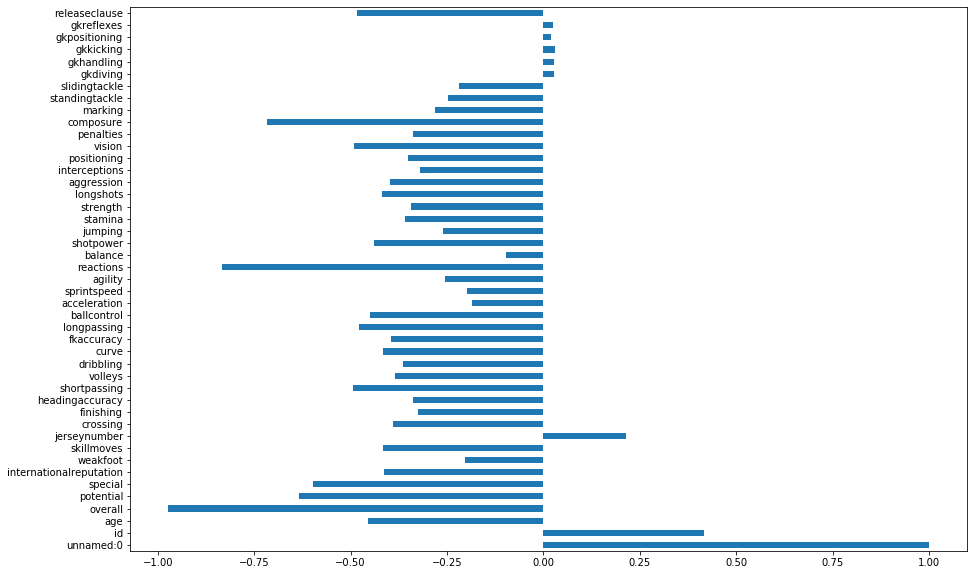

In [114]:
data.corr()['unnamed:0'].plot(kind = 'barh')

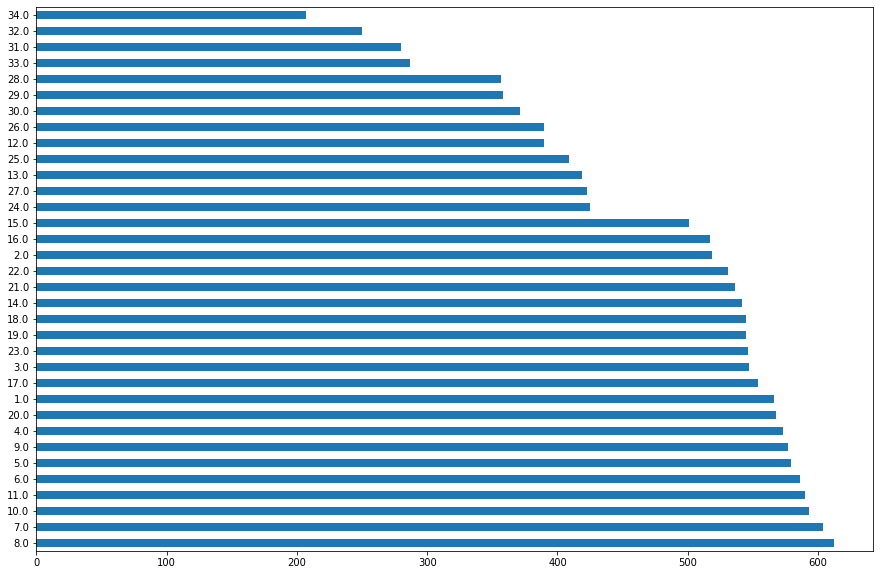

In [124]:
# Какие номера самые популярные? 
v = data.jerseynumber.value_counts()
v[v>v.mean()].plot(kind = 'barh')

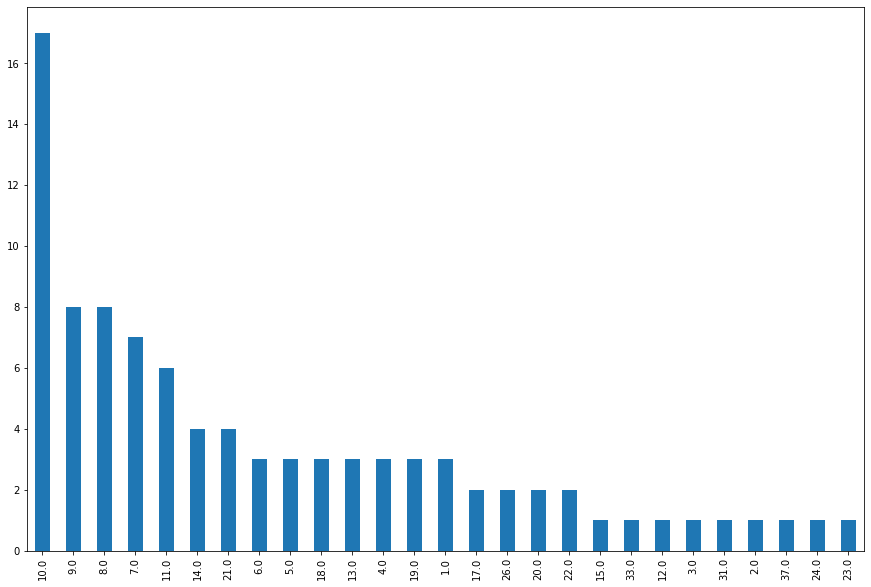

In [129]:
#Какие номера носят самые дорогие игроки ?
data[data.releaseclause>np.percentile(data.releaseclause,99.5)].jerseynumber.value_counts().plot(kind = 'bar')

In [137]:
data.club.value_counts()

Tottenham Hotspur      33
Manchester City        33
Everton                33
Real Madrid            33
Rayo Vallecano         33
                       ..
Ceará Sporting Club    20
Internacional          20
Sligo Rovers           19
Limerick FC            19
Derry City             18
Name: club, Length: 651, dtype: int64

In [144]:
r = data.groupby('club').releaseclause.max()
r2 = r[r>np.percentile(r,99)]
r2

club
Atlético Madrid        165800.0
Chelsea                172100.0
FC Barcelona           226500.0
Manchester City        196400.0
Paris Saint-Germain    228100.0
Real Madrid            156800.0
Tottenham Hotspur      160700.0
Name: releaseclause, dtype: float64

In [133]:
import seaborn as sns

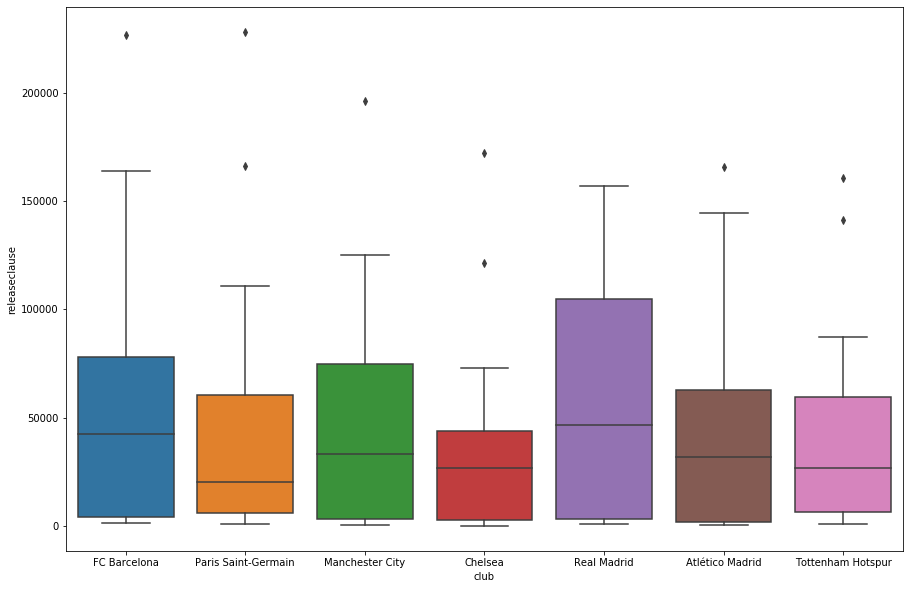

In [164]:
sns.boxplot(x = 'club', y = 'releaseclause',data = data[data.club.isin(r2.index)] )

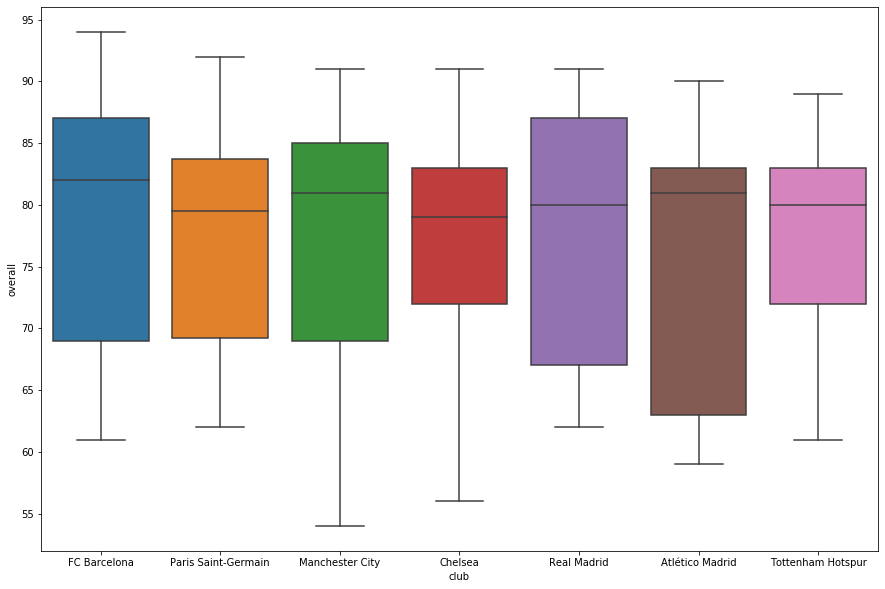

In [165]:
sns.boxplot(x = 'club', y = 'overall',data = data[data.club.isin(r2.index)] )

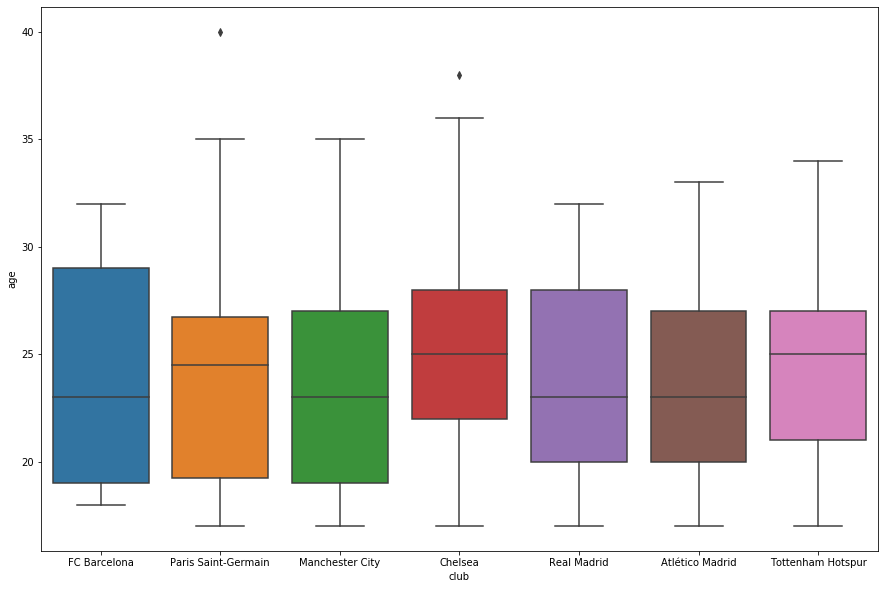

In [166]:
sns.boxplot(x = 'club', y = 'age',data = data[data.club.isin(r2.index)] )

In [167]:
data.overall.describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

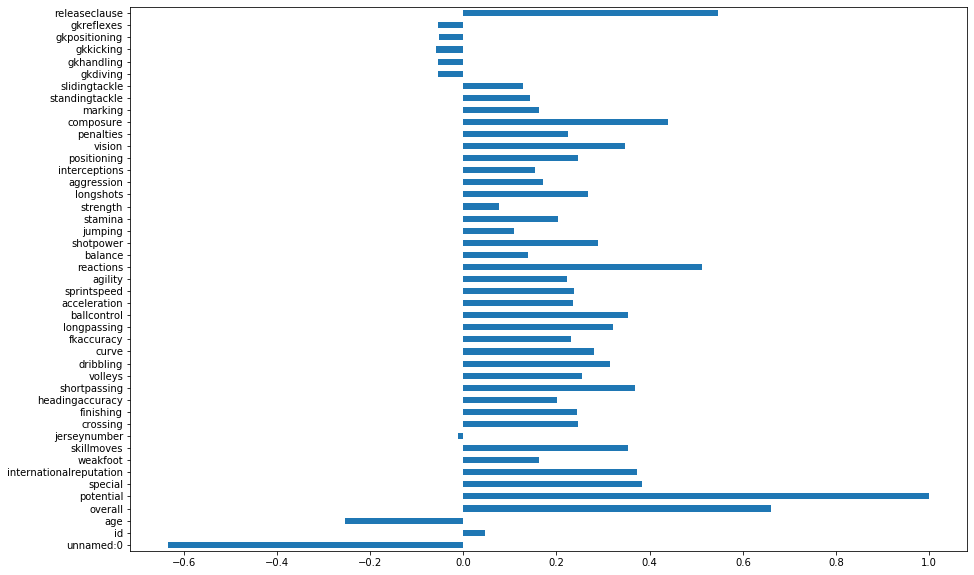

In [169]:
data.corr().potential.plot(kind = 'barh')

In [170]:
data.corr().potential

unnamed:0                 -0.633395
id                         0.047074
age                       -0.253312
overall                    0.660939
potential                  1.000000
special                    0.383727
internationalreputation    0.372993
weakfoot                   0.162346
skillmoves                 0.354290
jerseynumber              -0.010474
crossing                   0.246319
finishing                  0.243355
headingaccuracy            0.200988
shortpassing               0.369189
volleys                    0.254906
dribbling                  0.315019
curve                      0.279944
fkaccuracy                 0.230544
longpassing                0.321437
ballcontrol                0.354396
acceleration               0.234608
sprintspeed                0.236771
agility                    0.222310
reactions                  0.513425
balance                    0.138025
shotpower                  0.288318
jumping                    0.109151
stamina                    0

In [186]:
df = data[['overall','potential','age']]
df

,overall,potential,age
0,94,94,31
1,94,94,33
2,92,93,26
3,91,93,27
4,91,92,27
...,...,...,...
18202,47,65,19
18203,47,63,19
18204,47,67,16
18205,47,66,17


In [191]:
df.loc[:,'difference'] = df.potential - df.overall
df

,overall,potential,age,difference
0,94,94,31,0
1,94,94,33,0
2,92,93,26,1
3,91,93,27,2
4,91,92,27,1
...,...,...,...,...
18202,47,65,19,18
18203,47,63,19,16
18204,47,67,16,20
18205,47,66,17,19


In [192]:
df.corr()

,overall,potential,age,difference
overall,1.000000,0.660939,0.452350,-0.526665
potential,0.660939,1.000000,-0.253312,0.289836
age,0.452350,-0.253312,1.000000,-0.863849
difference,-0.526665,0.289836,-0.863849,1.000000


In [ ]:
С увеличением возраста разница между overall и potential уменьшается